In [39]:
import matplotlib
# %matplotlib inline
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from pylab import rcParams
# rcParams['figure.figsize'] = 10, 5
rcParams['figure.max_open_warning'] = False
%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)
import numpy as np
import scipy

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from hwn.minist.mnist import Net, get_mnist, nhwc_to_nchw


# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)

import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    print(nimgs, imshape)
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic



x_test, x_train, y_test, y_train = get_mnist()
inp = x_test[1:2]
dut = Net()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Visualize layer 0

In [52]:
my_out = dut.layer_output(inp, 0)

(32, 3, 3)
[[ 0.20810415  0.22961298  0.10008354]
 [-0.00606602  0.09682646  0.14466467]
 [ 0.09065038 -0.01872257 -0.11647765]]
[[ 0.22711448  0.04944572 -0.03370187]
 [ 0.10833812  0.04883811 -0.20224816]
 [ 0.1750012   0.06374963 -0.2108618 ]]
[[-0.05334173  0.25166613  0.210683  ]
 [ 0.11116436  0.0903822  -0.00569726]
 [ 0.12424339  0.08237084 -0.01292998]]
[[-0.09603578  0.15701169 -0.1011856 ]
 [-0.04088888 -0.01580509  0.01278573]
 [-0.10633187 -0.07833724 -0.00492546]]
[[ 0.1756231  -0.02436328 -0.2129592 ]
 [ 0.09158462  0.01841491 -0.04621527]
 [ 0.09179434 -0.0152685   0.17316748]]
[[ 0.06481211  0.19334142  0.01846481]
 [ 0.12639417  0.1387462   0.03844846]
 [ 0.10520988 -0.02487078  0.16173024]]
[[ 0.26410225  0.01015465  0.00564219]
 [ 0.0898303   0.02651005 -0.24563748]
 [-0.0295887  -0.10208125 -0.08806828]]
[[-0.12967288 -0.2045919  -0.14838107]
 [ 0.03699698  0.00774322  0.08220721]
 [ 0.09812067  0.19068271  0.13566437]]
[[ 0.16388595  0.10238761  0.20068684]
 [-0.1

In [96]:
keras_out = np.squeeze(dut.keras_layer_output(inp, 0))
my_out = dut.layer_output(inp, 0)

# [[ 0.20810415  0.22961298  0.10008354]
#  [-0.00606602  0.09682646  0.14466467]
#  [ 0.09065038 -0.01872257 -0.11647765]]

(32, 3, 3)
orig  [[ 0.20810415  0.22961298  0.10008354]
 [-0.00606602  0.09682646  0.14466467]
 [ 0.09065038 -0.01872257 -0.11647765]]
T  [[ 0.20810415 -0.00606602  0.09065038]
 [ 0.22961298  0.09682646 -0.01872257]
 [ 0.10008354  0.14466467 -0.11647765]]
[[-0.11647765  0.14466467  0.10008354]
 [-0.01872257  0.09682646  0.22961298]
 [ 0.09065038 -0.00606602  0.20810415]]


32 (26, 26)


<IPython.core.display.Javascript object>


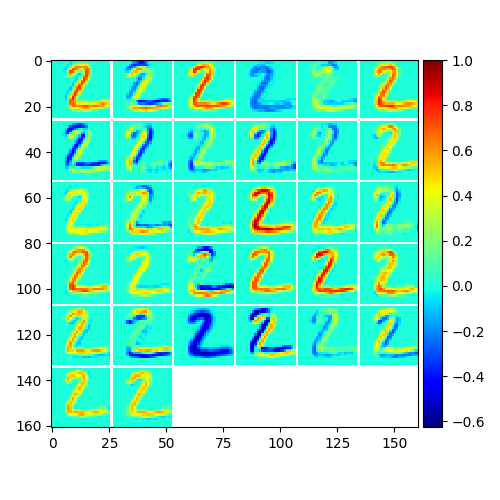

In [94]:
plt.figure(figsize=(5, 5))
nice_imshow(plt.gca(), make_mosaic(my_out, 6, 6))
plt.tight_layout()
plt.show()

32 (26, 26)


<IPython.core.display.Javascript object>


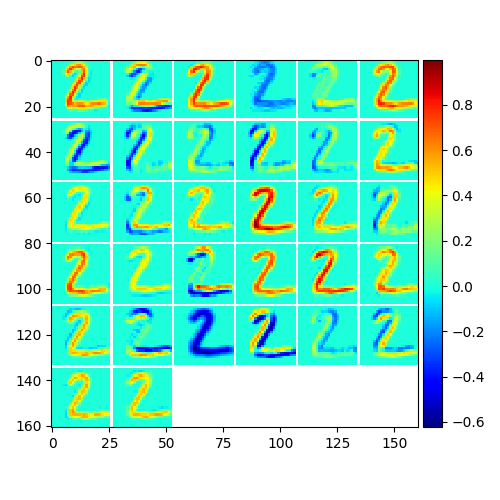

In [66]:
plt.figure(figsize=(5, 5))
nice_imshow(plt.gca(), make_mosaic(my_out, 6, 6))
plt.tight_layout()
plt.show()

32 (26, 26)


<IPython.core.display.Javascript object>


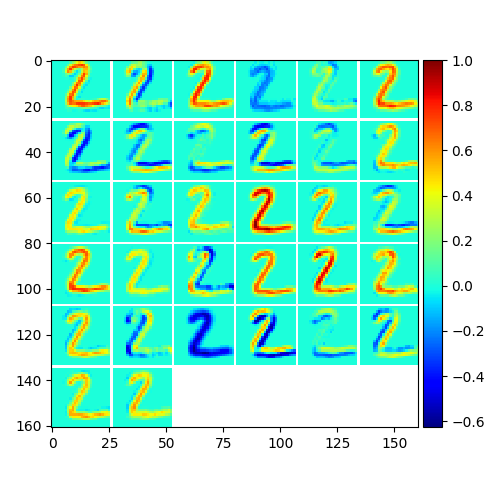

In [62]:
plt.figure(figsize=(5, 5))
nice_imshow(plt.gca(), make_mosaic(my_out, 6, 6))
plt.tight_layout()
plt.show()

32 (26, 26)
32 (26, 26)


<IPython.core.display.Javascript object>


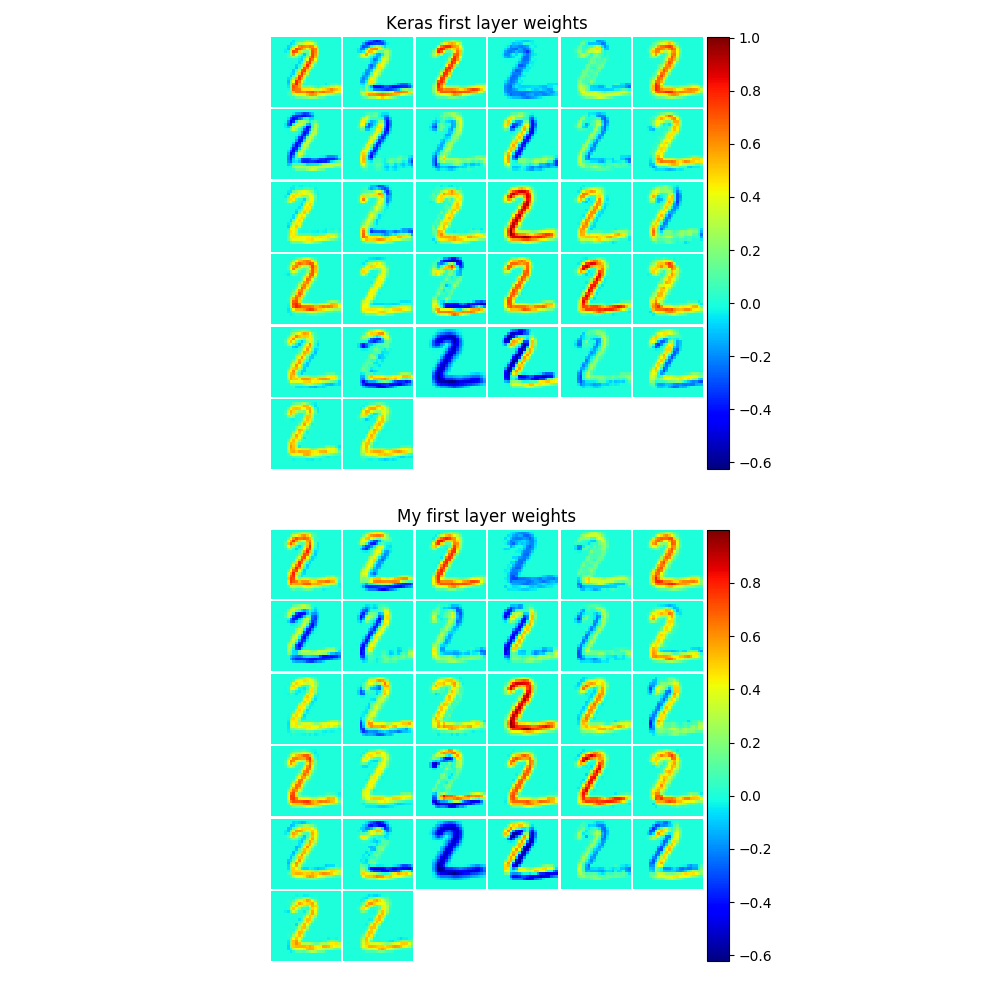

In [56]:

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.title('Keras first layer weights')
plt.axis('off')

nice_imshow(plt.gca(), make_mosaic(keras_out, 6, 6))

plt.subplot(2,1,2)
plt.title('My first layer weights')
plt.axis('off')

nice_imshow(plt.gca(), make_mosaic(my_out, 6, 6))
plt.tight_layout()
plt.show()

W shape :  (32, 26, 26)
32 (26, 26)


<IPython.core.display.Javascript object>


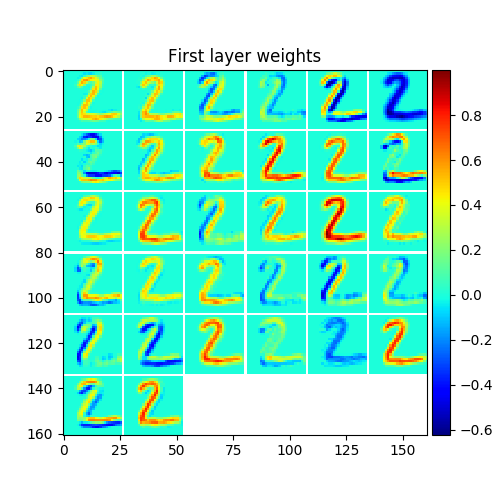

In [11]:
# Visualize weights
W = my_out
W = np.squeeze(W)
print("W shape : ", W.shape)

plt.figure(figsize=(5, 5))
plt.title('First layer weights')
nice_imshow(plt.gca(), make_mosaic(W, 6, 6))
plt.show()

<IPython.core.display.Javascript object>


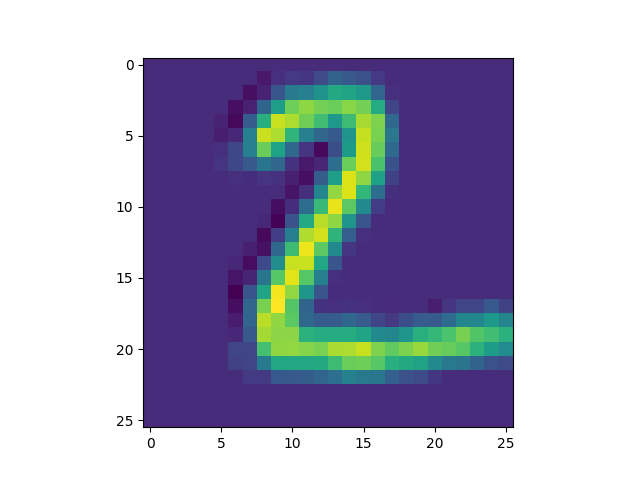

In [2]:
keras_out = dut.keras_layer_output(inp, 0)
tr = nhwc_to_nchw(keras_out)
plt.imshow(np.squeeze(tr)[0])
plt.show()

In [9]:
my_out = dut.layer_output(inp, 0)
o = np.squeeze(o)[0]
plt.imshow(o)
plt.show()

TypeError: Invalid dimensions for image data